In [2]:
import pandas as pd

df=pd.read_csv('laptops_10.csv',sep=',')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


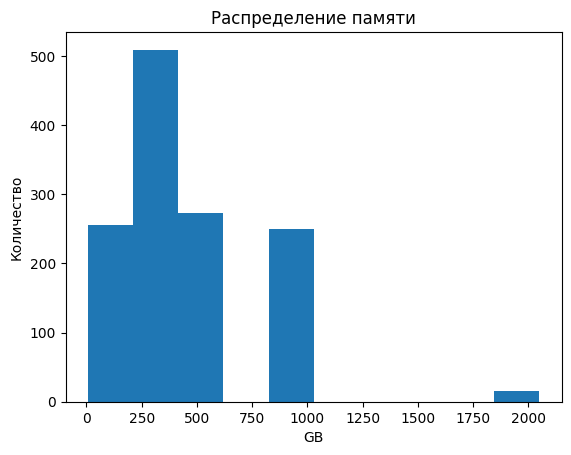

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');

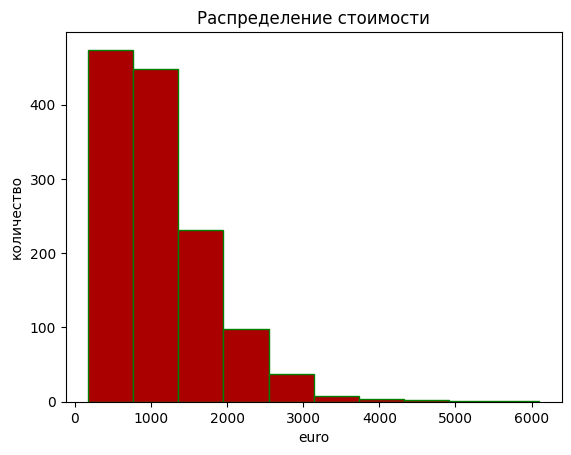

In [8]:
plt.hist(df['Price_euros'],color ='#AA0000',edgecolor='green')
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('количество');

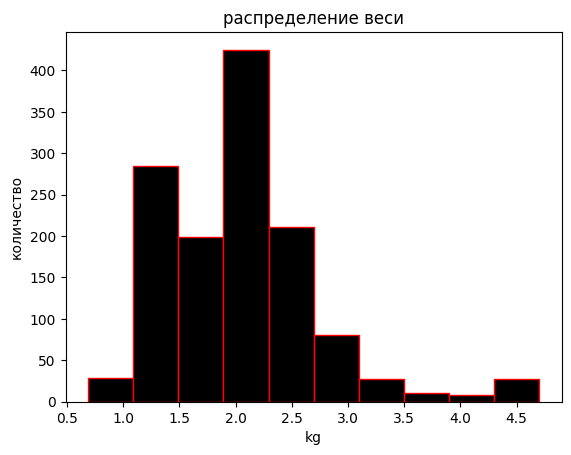

In [13]:
plt.hist(df['Weight'],color='#000000',edgecolor='red')
plt.title('распределение веси')
plt.xlabel('kg')
plt.ylabel('количество');

In [14]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

In [20]:
names=data.index
values=data.values

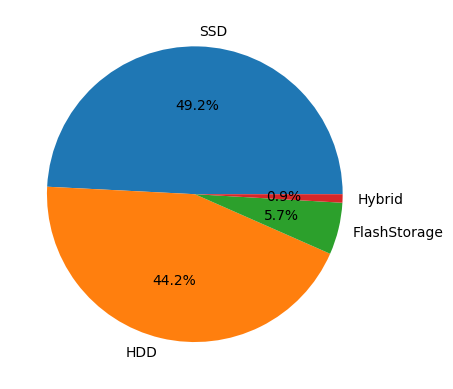

In [27]:
plt.pie(values, labels=names, autopct='%.1f%%');

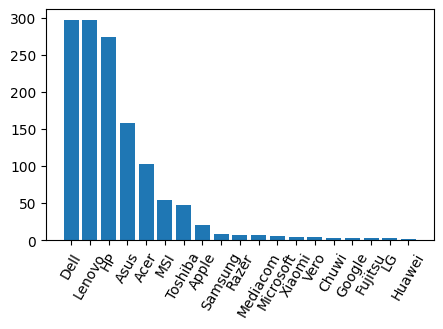

In [33]:
data = df['Company'].value_counts()
names = data.index
values = data.values

plt.figure(figsize=(5,3))
plt.bar(names, values)
plt.xticks(rotation=60);

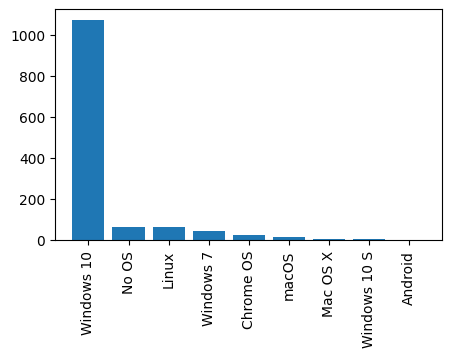

In [35]:
data = df['OpSys'].value_counts()
plt.figure(figsize=(5,3))
plt.bar(data.index, data.values)
plt.xticks(rotation=90);

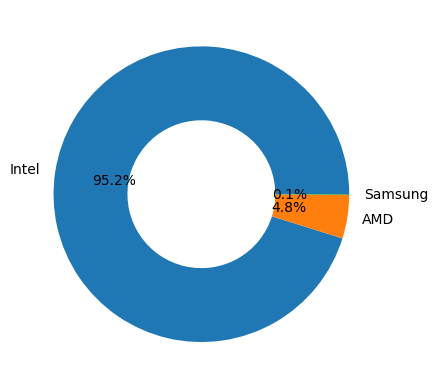

In [38]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels = data.index,autopct='%.1f%%',wedgeprops=dict(width=0.5) );

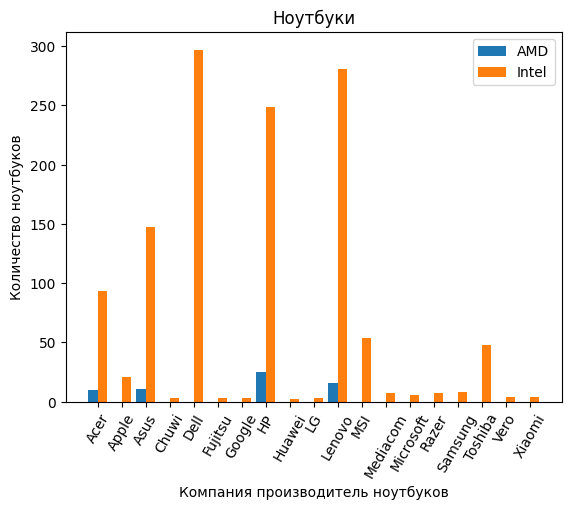

In [50]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

import numpy as np
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data['AMD'],width=w)
plt.bar(n_ticks + offset, data['Intel'],width=w)

plt.title('Ноутбуки')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD','Intel'])
plt.xticks(n_ticks, data['Company'], rotation=60);

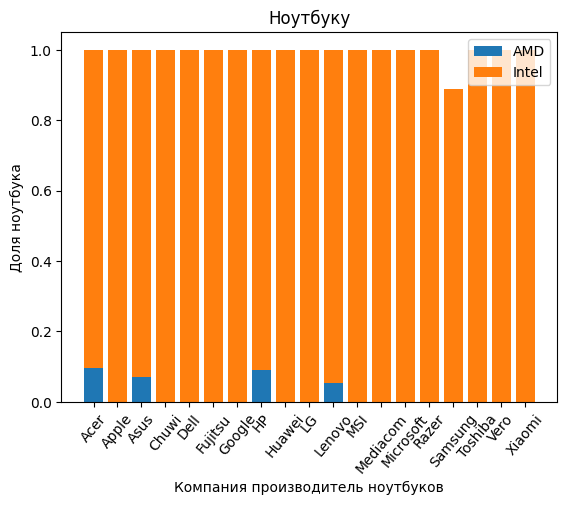

In [53]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'],normalize = 'index')
data = data.drop(columns=['Samsung']).reset_index()
data

plt.bar(data['Company'],data['AMD'])
plt.bar(data['Company'],data['Intel'], bottom=data['AMD'])

plt.title('Ноутбуку')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Доля ноутбука')
plt.legend(['AMD','Intel'])
plt.xticks(rotation=50);

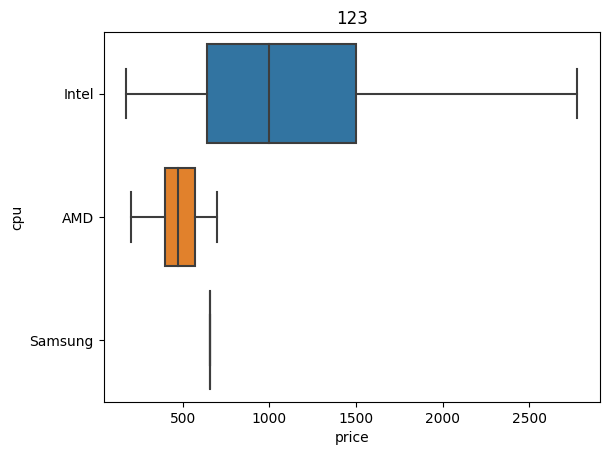

In [57]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers = False)

plt.title('123')
plt.xlabel('price')
plt.ylabel('cpu');

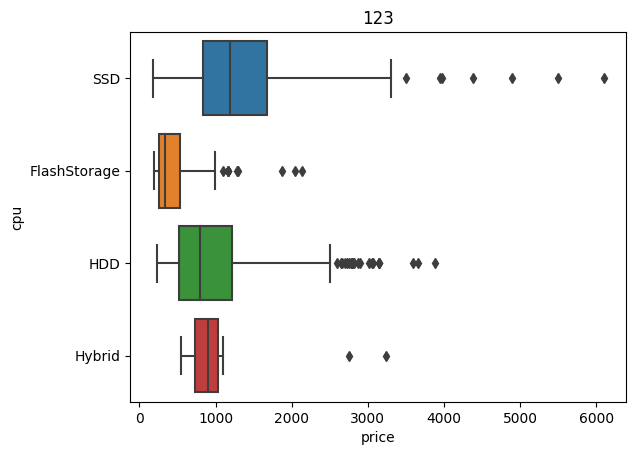

In [60]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis = 2)

plt.title('123')
plt.xlabel('price')
plt.ylabel('cpu');

In [64]:
corr_matrix = df.corr()
corr_matrix=np.round(corr_matrix,1)
corr_matrix[np.abs(corr_matrix)<0.3]=0
corr_matrix

C:\Users\DNS\AppData\Local\Temp\ipykernel_4120\1966936824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


<Axes: >

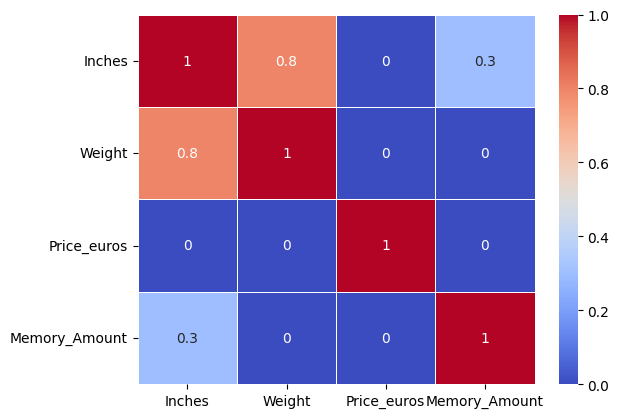

In [66]:
sns.heatmap(corr_matrix, annot = True, linewidths=.5, cmap='coolwarm')

In [ ]:
df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()
df.to_excel(r'C:\Users\Home\Desktop\1.xlsx')  

import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.lat, point.long],
        radius=2,
        popup={'price':point.price,
               'floors':point.floors}
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

